In [1]:
CHRONOS = "autogluon/chronos_datasets"
DATASET_CHRONOS = [
    "dominick",
    "ercot",
    "exchange_rate",
    #"monash_m3_monthly"
]

In [2]:
from datasets import load_dataset

In [3]:
for dataset in DATASET_CHRONOS:
    ds = load_dataset(CHRONOS, dataset, trust_remote_code=True)
    display(ds)

DatasetDict({
    train: Dataset({
        features: ['id', 'timestamp', 'target', 'im_0'],
        num_rows: 100014
    })
})

DatasetDict({
    train: Dataset({
        features: ['id', 'timestamp', 'target'],
        num_rows: 8
    })
})

DatasetDict({
    train: Dataset({
        features: ['id', 'timestamp', 'target'],
        num_rows: 8
    })
})

### Dominick Dataset

Dominick (Godahewa et al., 2021) contains weekly time series representing the profit of individual stock
keeping units from a retailer. Original data is from https://www.chicagobooth.edu/research/kilts/
datasets/dominicks.

Domain: Retail (Sales in GigtEval)

In [4]:
import pandas as pd

dominick_ds = load_dataset(CHRONOS, "dominick", trust_remote_code=True)
examples = [x for x in dominick_ds["train"]]
dominick_df = pd.DataFrame(examples)
dominick_df

,id,timestamp,target,im_0
0,T000000,"[1989-09-14 00:00:00, 1989-09-21 00:00:00, 198...","[40.209999084472656, 40.209999084472656, 0.0, ...",3459
1,T000001,"[1989-09-14 00:00:00, 1989-09-21 00:00:00, 198...","[22.81999969482422, 22.81999969482422, 0.0, 22...",1762
2,T000002,"[1989-09-14 00:00:00, 1989-09-21 00:00:00, 198...","[58.93000030517578, 58.93000030517578, 52.3300...",330
3,T000003,"[1989-09-14 00:00:00, 1989-09-21 00:00:00, 198...","[18.59000015258789, 0.0, 0.0, 0.0, 18.59000015...",4120
4,T000004,"[1989-09-14 00:00:00, 1989-09-21 00:00:00, 198...","[26.639999389648438, 26.639999389648438, 0.0, ...",1665
...,...,...,...,...
100009,T100009,"[1989-09-14 00:00:00, 1989-09-21 00:00:00, 198...","[13.449999809265137, 20.1200008392334, 20.1200...",3881
100010,T100010,"[1989-09-14 00:00:00, 1989-09-21 00:00:00, 198...","[40.66999816894531, 40.66999816894531, 40.6699...",2467
100011,T100011,"[1989-09-14 00:00:00, 1989-09-21 00:00:00, 198...","[42.380001068115234, 42.380001068115234, 38.99...",2569
100012,T100012,"[1989-09-14 00:00:00, 1989-09-21 00:00:00, 198...","[40.20000076293945, 40.20000076293945, 40.2000...",2324


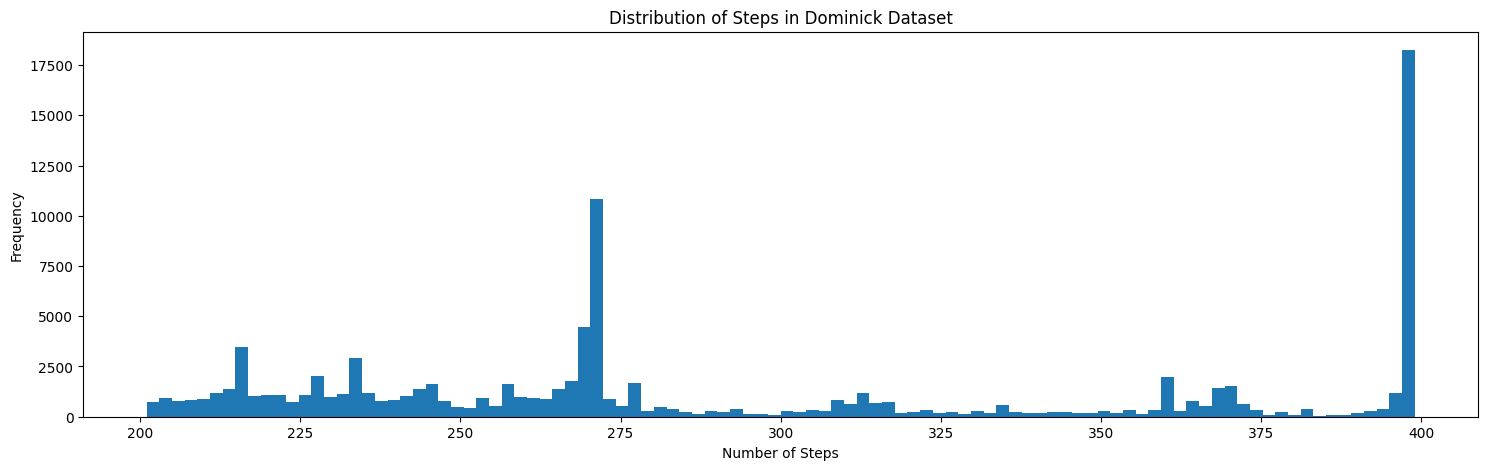

In [5]:
steps = []
for e in dominick_df["target"]:
    steps.append(len(e))

steps.sort()
len(steps)

import matplotlib.pyplot as plt

# histogram of steps
plt.figure(figsize=(18, 5))
plt.hist(steps, bins=100)
plt.xlabel("Number of Steps")
plt.ylabel("Frequency")
plt.title("Distribution of Steps in Dominick Dataset")
plt.show()

### Ercot Dataset

ERCOT Load contains hourly energy load in 8 US regions between 2004 and 2021.

Domain: Energy

In [6]:
ercot_ds = load_dataset(CHRONOS, "ercot", trust_remote_code=True)
examples = [x for x in ercot_ds["train"]]
ercot_df = pd.DataFrame(examples)
ercot_df

,id,timestamp,target
0,COAST,"[2004-01-01 01:00:00, 2004-01-01 02:00:00, 200...","[7225.08984375, 6994.25, 6717.419921875, 6554...."
1,EAST,"[2004-01-01 01:00:00, 2004-01-01 02:00:00, 200...","[877.7899780273438, 850.75, 831.6300048828125,..."
2,FAR_WEST,"[2004-01-01 01:00:00, 2004-01-01 02:00:00, 200...","[1044.8900146484375, 1032.0400390625, 1021.099..."
3,NORTH,"[2004-01-01 01:00:00, 2004-01-01 02:00:00, 200...","[745.7899780273438, 721.3400268554688, 699.700..."
4,NORTH_C,"[2004-01-01 01:00:00, 2004-01-01 02:00:00, 200...","[7124.2099609375, 6854.580078125, 6639.4799804..."
5,SOUTHERN,"[2004-01-01 01:00:00, 2004-01-01 02:00:00, 200...","[1660.449951171875, 1603.52001953125, 1527.989..."
6,SOUTH_C,"[2004-01-01 01:00:00, 2004-01-01 02:00:00, 200...","[3639.1201171875, 3495.159912109375, 3322.6999..."
7,WEST,"[2004-01-01 01:00:00, 2004-01-01 02:00:00, 200...","[654.6099853515625, 639.8800048828125, 623.419..."


In [7]:
len(ercot_df["target"][0])

154872

### Exchange Rate Dataset

Exchange Rate contains daily exchange rates for currencies of eight countries (Australia, British, Canada,
Switzerland, China, Japan, New Zealand and Singapore) between 1990 and 2016.

Domain: Finance and economics (Econ/Fin in GiftEval)

In [8]:
exchange_rate_ds = load_dataset(CHRONOS, "exchange_rate", trust_remote_code=True)
examples = [x for x in exchange_rate_ds["train"]]
exchange_rate_df = pd.DataFrame(examples)
exchange_rate_df

,id,timestamp,target
0,currency_1,"[1990-01-01 00:00:00, 1990-01-02 00:00:00, 199...","[0.7854999899864197, 0.7817999720573425, 0.786..."
1,currency_2,"[1990-01-01 00:00:00, 1990-01-02 00:00:00, 199...","[1.6109999418258667, 1.6100000143051147, 1.629..."
2,currency_3,"[1990-01-01 00:00:00, 1990-01-02 00:00:00, 199...","[0.8616979718208313, 0.8611040115356445, 0.861..."
3,currency_4,"[1990-01-01 00:00:00, 1990-01-02 00:00:00, 199...","[0.6341959834098816, 0.6335129737854004, 0.648..."
4,currency_5,"[1990-01-01 00:00:00, 1990-01-02 00:00:00, 199...","[0.21124200522899628, 0.21124200522899628, 0.2..."
5,currency_6,"[1990-01-01 00:00:00, 1990-01-02 00:00:00, 199...","[0.006837999913841486, 0.006862999871373177, 0..."
6,currency_7,"[1990-01-01 00:00:00, 1990-01-02 00:00:00, 199...","[0.5929999947547913, 0.593999981880188, 0.5972..."
7,currency_8,"[1990-01-01 00:00:00, 1990-01-02 00:00:00, 199...","[0.5254859924316406, 0.5239719748497009, 0.526..."


In [9]:
len(exchange_rate_df["target"][0])

7588

### Data properties

In [10]:
import datetime

PROPRIETIES = ["num_variates", "rows", "start", "freq_long", "freq", "num_steps", "domain"]
FREQ_MAP = {
    datetime.timedelta(days=7): "W",
    datetime.timedelta(days=1): "D",
    datetime.timedelta(hours=1): "H",
}

def get_properties(df):
    properties = {}
    properties["num_variates"] = len(df["target"][0][0]) if isinstance(df["target"][0][0], list) else 1
    properties["rows"] = len(df)
    properties["start"] = str(df["timestamp"][0][0])
    properties["freq_long"] = df["timestamp"][0][1] - df["timestamp"][0][0]
    properties["freq"] = FREQ_MAP.get(properties["freq_long"], "unknown")
    properties["freq_long"] = str(properties["freq_long"])

    steps = []
    for e in df["target"]:
        steps.append(len(e))
    step_min = min(steps)
    step_max = max(steps)
    if step_min == step_max:
        properties["num_steps"] = step_min
    else:
        properties["num_steps"] = (step_min, step_max)
    
    return properties

In [11]:
# check if all frequencies are the same
def check_frequencies(df):
    frequencies = set()
    for ts in df["timestamp"]:
        frequencies.add(ts[1] - ts[0])
    return len(frequencies) == 1

check_frequencies(dominick_df), check_frequencies(ercot_df), check_frequencies(exchange_rate_df)

(True, True, True)

In [12]:
dataset_properties_map = {
    "dominick": get_properties(dominick_df),
    "ercot": get_properties(ercot_df),
    "exchange_rate": get_properties(exchange_rate_df),
}

# add domain information
dataset_properties_map["dominick"]["domain"] = "Sales"
dataset_properties_map["ercot"]["domain"] = "Energy"
dataset_properties_map["exchange_rate"]["domain"] = "Econ/Fin"

# Display the properties of each dataset
for dataset, properties in dataset_properties_map.items():
    print(f"Dataset: {dataset}")
    for prop in PROPRIETIES:
        print(f"  {prop}: {properties[prop]}")
    print()

Dataset: dominick
  num_variates: 1
  rows: 100014
  start: 1989-09-14 00:00:00
  freq_long: 7 days, 0:00:00
  freq: W
  num_steps: (201, 399)
  domain: Sales

Dataset: ercot
  num_variates: 1
  rows: 8
  start: 2004-01-01 01:00:00
  freq_long: 0 days 01:00:00
  freq: H
  num_steps: 154872
  domain: Energy

Dataset: exchange_rate
  num_variates: 1
  rows: 8
  start: 1990-01-01 00:00:00
  freq_long: 1 day, 0:00:00
  freq: D
  num_steps: 7588
  domain: Econ/Fin



#### Prediction Lenghts

In [13]:
# prediction lengths
# exchange_rate: 7588 -> short: 8, medium: 80, long: 120
# ercot: 154872 each ts: split in 3 -> 51624 -> short: 48, medium: 480, long: 720
# dominick: short: 2, medium: 20, long: 30

In [14]:
8*15

120

In [15]:
154872 / 3, 48*15

(51624.0, 720)

In [ ]:
# add pred information
dataset_properties_map["dominick"]["prediction_length"] = 2
dataset_properties_map["ercot"]["prediction_length"] = 48
dataset_properties_map["exchange_rate"]["prediction_length"] = 8

In [17]:
import json

with open("data/chronos_data_proprieties.json", "w") as f:
    json.dump(dataset_properties_map, f)

### Prepare Data

In [18]:
dominick_final_df = pd.DataFrame()

dominick_final_df["start"] = [x[0] for x in dominick_df["timestamp"]]
dominick_final_df["freq"] = "W"

dominick_final_df["ts"] = [x[:-30] for x in dominick_df["target"]]
dominick_final_df["target"] = [x[-30:] for x in dominick_df["target"]]

dominick_final_df

,start,freq,ts,target
0,1989-09-14,W,"[40.209999084472656, 40.209999084472656, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1989-09-14,W,"[22.81999969482422, 22.81999969482422, 0.0, 22...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1989-09-14,W,"[58.93000030517578, 58.93000030517578, 52.3300...","[0.0, 60.29999923706055, 60.29999923706055, 0...."
3,1989-09-14,W,"[18.59000015258789, 0.0, 0.0, 0.0, 18.59000015...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1989-09-14,W,"[26.639999389648438, 26.639999389648438, 0.0, ...","[26.200000762939453, 26.200000762939453, 13.55..."
...,...,...,...,...
100009,1989-09-14,W,"[13.449999809265137, 20.1200008392334, 20.1200...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
100010,1989-09-14,W,"[40.66999816894531, 40.66999816894531, 40.6699...","[0.0, 0.0, 46.720001220703125, 46.720001220703..."
100011,1989-09-14,W,"[42.380001068115234, 42.380001068115234, 38.99...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
100012,1989-09-14,W,"[40.20000076293945, 40.20000076293945, 40.2000...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [19]:
ercot_df.head(2)

,id,timestamp,target
0,COAST,"[2004-01-01 01:00:00, 2004-01-01 02:00:00, 200...","[7225.08984375, 6994.25, 6717.419921875, 6554...."
1,EAST,"[2004-01-01 01:00:00, 2004-01-01 02:00:00, 200...","[877.7899780273438, 850.75, 831.6300048828125,..."


In [20]:
# split each ts in 3 equal part
154872 / 3, 154872 / 3 * 2

(51624.0, 103248.0)

In [21]:
import numpy as np

ercot_final_df = pd.DataFrame()

split_timestamp = []
for x in ercot_df['timestamp']:
    split_timestamp.append(x[0])
    split_timestamp.append(x[51624])
    split_timestamp.append(x[103248])
ercot_final_df["start"] = split_timestamp

ercot_final_df["freq"] = "H"

split_target = []
for x in ercot_df['target']:
    split_target.append(x[0:51624])
    split_target.append(x[51624:103248])
    split_target.append(x[103248:])
ercot_final_df["ts"] = [x[:-720] for x in split_target]
ercot_final_df["target"] = [x[-720:] for x in split_target]

ercot_final_df

,start,freq,ts,target
0,2004-01-01 01:00:00,H,"[7225.08984375, 6994.25, 6717.419921875, 6554....","[8680.91015625, 8376.1201171875, 8164.5, 8061...."
1,2009-11-21 01:00:00,H,"[7102.43017578125, 6807.2900390625, 6703.06005...","[9897.6904296875, 9534.4599609375, 9285.629882..."
2,2015-10-12 01:00:00,H,"[10161.66015625, 9754.2197265625, 9469.5195312...","[15041.6904296875, 14364.7998046875, 13906.879..."
3,2004-01-01 01:00:00,H,"[877.7899780273438, 850.75, 831.6300048828125,...","[1071.27001953125, 1035.4000244140625, 1008.23..."
4,2009-11-21 01:00:00,H,"[985.8200073242188, 950.8400268554688, 918.890...","[1364.47998046875, 1286.31005859375, 1215.7600..."
5,2015-10-12 01:00:00,H,"[1207.5699462890625, 1148.02001953125, 1103.46...","[1700.97998046875, 1656.0999755859375, 1600.92..."
6,2004-01-01 01:00:00,H,"[1044.8900146484375, 1032.0400390625, 1021.099...","[1048.8699951171875, 1023.1900024414062, 1019...."
7,2009-11-21 01:00:00,H,"[1119.8800048828125, 1121.8900146484375, 1119....","[2071.2900390625, 2024.760009765625, 1991.7099..."
8,2015-10-12 01:00:00,H,"[1920.739990234375, 1879.6400146484375, 1860.3...","[4052.340087890625, 3986.320068359375, 3948.56..."
9,2004-01-01 01:00:00,H,"[745.7899780273438, 721.3400268554688, 699.700...","[633.4299926757812, 615.1400146484375, 593.809..."


In [22]:
exchange_rate_final_df = pd.DataFrame()

exchange_rate_final_df["start"] = [x[0] for x in exchange_rate_df["timestamp"]]
exchange_rate_final_df["freq"] = "D"

exchange_rate_final_df["ts"] = [x[:-120] for x in exchange_rate_df["target"]]
exchange_rate_final_df["target"] = [x[-120:] for x in exchange_rate_df["target"]]

exchange_rate_final_df

,start,freq,ts,target
0,1990-01-01,D,"[0.7854999899864197, 0.7817999720573425, 0.786...","[0.7569739818572998, 0.7570599913597107, 0.758..."
1,1990-01-01,D,"[1.6109999418258667, 1.6100000143051147, 1.629...","[1.329442024230957, 1.3293980360031128, 1.3310..."
2,1990-01-01,D,"[0.8616979718208313, 0.8611040115356445, 0.861...","[0.769527018070221, 0.7695559859275818, 0.7732..."
3,1990-01-01,D,"[0.6341959834098816, 0.6335129737854004, 0.648...","[1.019981026649475, 1.0193209648132324, 1.0204..."
4,1990-01-01,D,"[0.21124200522899628, 0.21124200522899628, 0.2...","[0.14968900382518768, 0.1496489942073822, 0.14..."
5,1990-01-01,D,"[0.006837999913841486, 0.006862999871373177, 0...","[0.009616999886929989, 0.009618000127375126, 0..."
6,1990-01-01,D,"[0.5929999947547913, 0.593999981880188, 0.5972...","[0.7303529977798462, 0.7295010089874268, 0.730..."
7,1990-01-01,D,"[0.5254859924316406, 0.5239719748497009, 0.526...","[0.7352399826049805, 0.7351319789886475, 0.736..."


### Save

In [23]:
exchange_rate_final_df.to_parquet("data/chronos_data/exchange_rate.parquet", compression="brotli")
ercot_final_df.to_parquet("data/chronos_data/ercot.parquet", compression="brotli")
dominick_final_df.to_parquet("data/chronos_data/dominick.parquet", compression="brotli")

In [24]:
#dominick_df.to_csv("data/chronos_data/dominick.csv")
#ercot_df.to_csv("data/chronos_data/ercot.csv")
#exchange_rate_df.to_csv("data/chronos_data/exchange_rate.csv")

In [25]:
df = pd.read_parquet("data/chronos_data/exchange_rate.parquet")
df

,start,freq,ts,target
0,1990-01-01,D,"[0.7854999899864197, 0.7817999720573425, 0.786...","[0.7569739818572998, 0.7570599913597107, 0.758..."
1,1990-01-01,D,"[1.6109999418258667, 1.6100000143051147, 1.629...","[1.329442024230957, 1.3293980360031128, 1.3310..."
2,1990-01-01,D,"[0.8616979718208313, 0.8611040115356445, 0.861...","[0.769527018070221, 0.7695559859275818, 0.7732..."
3,1990-01-01,D,"[0.6341959834098816, 0.6335129737854004, 0.648...","[1.019981026649475, 1.0193209648132324, 1.0204..."
4,1990-01-01,D,"[0.21124200522899628, 0.21124200522899628, 0.2...","[0.14968900382518768, 0.1496489942073822, 0.14..."
5,1990-01-01,D,"[0.006837999913841486, 0.006862999871373177, 0...","[0.009616999886929989, 0.009618000127375126, 0..."
6,1990-01-01,D,"[0.5929999947547913, 0.593999981880188, 0.5972...","[0.7303529977798462, 0.7295010089874268, 0.730..."
7,1990-01-01,D,"[0.5254859924316406, 0.5239719748497009, 0.526...","[0.7352399826049805, 0.7351319789886475, 0.736..."


In [26]:
import os
print(os.path.getsize("data/chronos_data/dominick.parquet") / 1e6, "MB")

24.59068 MB


### Others

In [27]:
from gift_eval.data import Dataset

# Load the dataset
to_univariate = False  # Whether to convert the data to univariate
term = "short"

dataset = Dataset(name="jena_weather/10T", term=term, to_univariate=to_univariate)
display(dataset)

In [28]:
dataset.test_data

c:\Documenti\VS_Code\tesi\TSFM-ZeroShotEval\src\gift_eval\data.py:149: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  freq = norm_freq_str(to_offset(self.freq).name)


TestData(dataset=Map(fn=Compose(<gluonts.dataset.common.ProcessDataEntry object at 0x000002CA55F0AF20>, <function itemize_start at 0x000002CB051BB370>), iterable=Dataset({
    features: ['item_id', 'start', 'freq', 'target'],
    num_rows: 1
})), splitter=OffsetSplitter(offset=-960), prediction_length=48, windows=20, distance=48, max_history=None)

In [29]:
i = 0
for x in dataset.test_data:
    if i < 50:
        print(x[0]["target"].shape, x[1]["target"].shape)
        i += 1
    else:
        break

(21, 51744) (21, 48)
(21, 51792) (21, 48)
(21, 51840) (21, 48)
(21, 51888) (21, 48)
(21, 51936) (21, 48)
(21, 51984) (21, 48)
(21, 52032) (21, 48)
(21, 52080) (21, 48)
(21, 52128) (21, 48)
(21, 52176) (21, 48)
(21, 52224) (21, 48)
(21, 52272) (21, 48)
(21, 52320) (21, 48)
(21, 52368) (21, 48)
(21, 52416) (21, 48)
(21, 52464) (21, 48)
(21, 52512) (21, 48)
(21, 52560) (21, 48)
(21, 52608) (21, 48)
(21, 52656) (21, 48)


c:\Users\giuli\anaconda3\lib\site-packages\gluonts\dataset\common.py:263: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  return pd.Period(val, freq)


In [30]:
x[0], x[1]["target"].shape

({'item_id': np.str_('item_0'),
  'start': Period('2020-01-01 00:10', '10min'),
  'freq': np.str_('10T'),
  'target': array([[1.00889e+03, 1.00876e+03, 1.00866e+03, ..., 9.77590e+02,
          9.77570e+02, 9.77600e+02],
         [7.10000e-01, 7.50000e-01, 7.30000e-01, ..., 3.27000e+00,
          3.27000e+00, 3.28000e+00],
         [2.73180e+02, 2.73220e+02, 2.73210e+02, ..., 2.78210e+02,
          2.78210e+02, 2.78230e+02],
         ...,
         [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 3.19300e+01,
          2.42700e+01, 2.46100e+01],
         [1.14500e+01, 1.15100e+01, 1.16000e+01, ..., 1.38400e+01,
          1.38200e+01, 1.38000e+01],
         [4.28100e+02, 4.28000e+02, 4.27600e+02, ..., 4.27000e+02,
          4.26500e+02, 4.26600e+02]], dtype=float32)},
 (21, 48))

In [31]:
dataset.test_data

TestData(dataset=Map(fn=Compose(<gluonts.dataset.common.ProcessDataEntry object at 0x000002CA55F0AF20>, <function itemize_start at 0x000002CB051BB370>), iterable=Dataset({
    features: ['item_id', 'start', 'freq', 'target'],
    num_rows: 1
})), splitter=OffsetSplitter(offset=-960), prediction_length=48, windows=20, distance=48, max_history=None)

In [32]:
x

({'item_id': np.str_('item_0'),
  'start': Period('2020-01-01 00:10', '10min'),
  'freq': np.str_('10T'),
  'target': array([[1.00889e+03, 1.00876e+03, 1.00866e+03, ..., 9.77590e+02,
          9.77570e+02, 9.77600e+02],
         [7.10000e-01, 7.50000e-01, 7.30000e-01, ..., 3.27000e+00,
          3.27000e+00, 3.28000e+00],
         [2.73180e+02, 2.73220e+02, 2.73210e+02, ..., 2.78210e+02,
          2.78210e+02, 2.78230e+02],
         ...,
         [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 3.19300e+01,
          2.42700e+01, 2.46100e+01],
         [1.14500e+01, 1.15100e+01, 1.16000e+01, ..., 1.38400e+01,
          1.38200e+01, 1.38000e+01],
         [4.28100e+02, 4.28000e+02, 4.27600e+02, ..., 4.27000e+02,
          4.26500e+02, 4.26600e+02]], dtype=float32)},
 {'item_id': np.str_('item_0'),
  'start': Period('2020-12-31 16:10', '10min'),
  'freq': np.str_('10T'),
  'target': array([[977.7 , 977.73, 977.74, ..., 978.26, 978.26, 978.24],
         [  3.3 ,   3.3 ,   3.32, ...,   1.99,  

### Gluonts Dataset Format

In [33]:
dominick_final_df = pd.DataFrame()

dominick_final_df["start"] = [x[0] for x in dominick_df["timestamp"]]
dominick_final_df["freq"] = "W"
dominick_final_df["target"] = dominick_df["target"]

In [34]:
import numpy as np

ercot_final_df = pd.DataFrame()

split_timestamp = []
for x in ercot_df['timestamp']:
    split_timestamp.append(x[0])
    split_timestamp.append(x[51624])
    split_timestamp.append(x[103248])
ercot_final_df["start"] = split_timestamp

ercot_final_df["freq"] = "H"

split_target = []
for x in ercot_df['target']:
    split_target.append(x[0:51624])
    split_target.append(x[51624:103248])
    split_target.append(x[103248:])
ercot_final_df["target"] = split_target

In [35]:
exchange_rate_final_df = pd.DataFrame()

exchange_rate_final_df["start"] = [x[0] for x in exchange_rate_df["timestamp"]]
exchange_rate_final_df["freq"] = "D"
exchange_rate_final_df["target"] = exchange_rate_df["target"]

In [36]:
exchange_rate_final_df.to_parquet("data/chronos_benchmark/exchange_rate.arrow", engine="pyarrow")
ercot_final_df.to_parquet("data/chronos_benchmark/ercot.arrow", engine="pyarrow")
dominick_final_df.to_parquet("data/chronos_benchmark/dominick.arrow", engine="pyarrow")

In [37]:
# prediction lengths
# exchange_rate: 7588 -> short: 8, medium: 80, long: 120
# ercot: 154872 each ts: split in 3 -> 51624 -> short: 48, medium: 480, long: 720
# dominick: short: 2, medium: 20, long: 30

In [38]:
from gluonts.dataset.split import TestData, OffsetSplitter

exchange_rate_data = TestData(
    dataset=exchange_rate_final_df,
    splitter=OffsetSplitter(offset=-8),
    prediction_length=8,
    windows=15,
    distance=None,
    max_history=None
)

ercot_data = TestData(
    dataset=ercot_final_df,
    splitter=OffsetSplitter(offset=-48),
    prediction_length=48,
    windows=15,
    distance=None,
    max_history=None
)

dominick_data = TestData(
    dataset=dominick_final_df,
    splitter=OffsetSplitter(offset=-2),
    prediction_length=2,
    windows=15,
    distance=None,
    max_history=None
)